## Exploring proteins stored into Mongo Database
### This notebook was done to explore the data of biological sequences and expression level

In [2]:
# Import modules
import pymongo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
# Create connetion
conn = pymongo.MongoClient()
db = conn.sequencesdb
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'sequencesdb')


In [4]:
# Print my collection (proteins)
db.list_collection_names()

['proteins']

In [5]:
# Checking the document structure
db.proteins.find_one()

{'_id': ObjectId('5cf6cf3ef4e2f510e5b8c212'),
 'code': 'SB0020CVL',
 'species': 'Bothops jararaca',
 'type_seq': 'nucleotide',
 'seq_size': 699,
 'id': 'TRINITY_DN17539_c4_g1_i2.p1|117-815(+)|BJAR454SVSP07_SVSP',
 'sequence': 'ATGGTGCTGATCAGAGTGCTAGCAAACCTTCTGATACTACAGCTTTCCTACGTACAAAAGTCTTCTGAACTGGTCGTTGGAGGTCGTCCATGTAACATAAATGAACATCGTTCCCTTGTTGTCTTGCTTAACTCTAGTGGGTTTCTCTGCGCTGGGACTTTGATCAACCAGGAATGGGTGCTCACTGCTGCACACTGCGACATTAAAAATCTCCAGATACAGCTTGGTGTGCATAGCAAAAAGGTACGAAATGAGGATGAGCAGACAAGAGACCCAAAGGAGAAGTTCTTTTGTCTCAGTAGCAAAACCAATAATGAATGGGAGAAGGACATCATGTTGATCAAGCTGGACAGTCGTGTTAGCAACAGTGAACACATCGCACCTCTCAGCTTGCCTTCCAGCCCTCCCAGTGTGGGATCACTTTGCCGTATTATGGGATGGGGCACAATCTCATCTACTAAAGAAACTTATCCCAATGTCCCTCGTTGTGCTAACATTAACATACTCGATTATGCAGTGTGTCGAGCAGCTTACCCATGGTGGCCGGCGACAACCAGAACATTATGTGCAGGTGTCCTGCAAGGAGGCAAAGATACATGTGAGGGTGACTCTGGGGGACCCCTCATCTGTAATGGACAAATCCAGGGCATTGTATCTTGGGGGTCGCATCCTTGTGGCCGACGTCTTAAGCCTGGCTTC',
 'tpm': 55.51,
 'fpkm': 74.58}

In [6]:
# Check sequence type
db.proteins.distinct('type_seq')

['nucleotide']

In [7]:
# Total of sequences
db.proteins.count_documents({})

276

In [8]:
# Convert a collection to a dataframe
df = pd.DataFrame(list(db.proteins.find()))

In [9]:
df.head()

,_id,code,fpkm,id,seq_size,sequence,species,tpm,type_seq
0,5cf6cf3ef4e2f510e5b8c212,SB0020CVL,74.58,TRINITY_DN17539_c4_g1_i2.p1|117-815(+)|BJAR454...,699,ATGGTGCTGATCAGAGTGCTAGCAAACCTTCTGATACTACAGCTTT...,Bothops jararaca,55.51,nucleotide
1,5cf6cf3ef4e2f510e5b8c213,SB0020CVL,2.32,comp3_seq30.p1|5195-4413(-)|BJAR454SVSP04_SVSP,783,ATGGTGCTGATCAGAGTACTAGCAAACCTTCTGATACTACAGCTTT...,Bothops jararaca,1.73,nucleotide
2,5cf6cf3ef4e2f510e5b8c214,SB0020CVL,16196.42,k127_NODE_8838_length_1048_cov_5093.282302_g82...,720,ATGATTGCCTTCATTGTCTTGCTAATTCTTGCTGCAGTGTTGCAAC...,Bothops jararaca,12054.97,nucleotide
3,5cf6cf3ef4e2f510e5b8c215,SB0020CVL,1445.12,cl_24411_1.p1|2793-91(-)|BJAR454DIESTER2_DIESTER,2703,CCTGTTGTCACTTCCAGCAGTTCCTTGAGACTGGATAGTACCTCCC...,Bothops jararaca,1075.60,nucleotide
4,5cf6cf3ef4e2f510e5b8c216,SB0020CVL,30.32,TRINITY_DN18143_c2_g1_i16.p3|1027-569(-)|Q90X2...,459,ATGCTCCCGGGTGCCAGCTTCAGGGCTGGACCCTTTGCTAACTGGG...,Bothops jararaca,22.57,nucleotide


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 9 columns):
_id         276 non-null object
code        276 non-null object
fpkm        276 non-null float64
id          276 non-null object
seq_size    276 non-null int64
sequence    276 non-null object
species     276 non-null object
tpm         276 non-null float64
type_seq    276 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 19.5+ KB


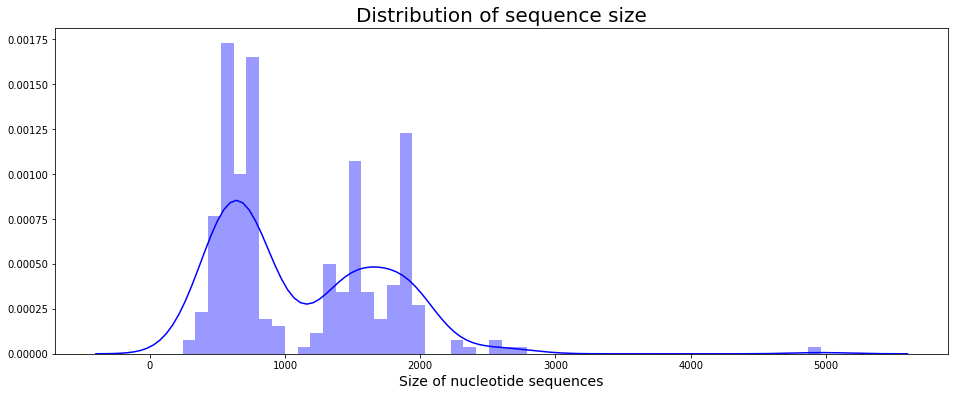

In [11]:
plt.figure(figsize=(16, 6))
fig1= sns.distplot(sorted(df.seq_size), bins=50, color='b')
plt.xlabel('Size of nucleotide sequences', size=14)
plt.title('Distribution of sequence size', size=20)
plt.show(fig1)

In [12]:
print('The average of sequence size is: {}'.format(df.seq_size.mean().round()))

The average of sequence size is: 1132.0


In [17]:
#Adicionando coluna com a identificação de cada família
lines_splited = df.id.str.split(pat='_')
families = []
for i in lines_splited:
    families.append(i[-1])  

df['Family'] = families

In [18]:
df.head()

,_id,code,fpkm,id,seq_size,sequence,species,tpm,type_seq,Family
0,5cf6cf3ef4e2f510e5b8c212,SB0020CVL,74.58,TRINITY_DN17539_c4_g1_i2.p1|117-815(+)|BJAR454...,699,ATGGTGCTGATCAGAGTGCTAGCAAACCTTCTGATACTACAGCTTT...,Bothops jararaca,55.51,nucleotide,SVSP
1,5cf6cf3ef4e2f510e5b8c213,SB0020CVL,2.32,comp3_seq30.p1|5195-4413(-)|BJAR454SVSP04_SVSP,783,ATGGTGCTGATCAGAGTACTAGCAAACCTTCTGATACTACAGCTTT...,Bothops jararaca,1.73,nucleotide,SVSP
2,5cf6cf3ef4e2f510e5b8c214,SB0020CVL,16196.42,k127_NODE_8838_length_1048_cov_5093.282302_g82...,720,ATGATTGCCTTCATTGTCTTGCTAATTCTTGCTGCAGTGTTGCAAC...,Bothops jararaca,12054.97,nucleotide,CRISP
3,5cf6cf3ef4e2f510e5b8c215,SB0020CVL,1445.12,cl_24411_1.p1|2793-91(-)|BJAR454DIESTER2_DIESTER,2703,CCTGTTGTCACTTCCAGCAGTTCCTTGAGACTGGATAGTACCTCCC...,Bothops jararaca,1075.60,nucleotide,DIESTER
4,5cf6cf3ef4e2f510e5b8c216,SB0020CVL,30.32,TRINITY_DN18143_c2_g1_i16.p3|1027-569(-)|Q90X2...,459,ATGCTCCCGGGTGCCAGCTTCAGGGCTGGACCCTTTGCTAACTGGG...,Bothops jararaca,22.57,nucleotide,VEGF


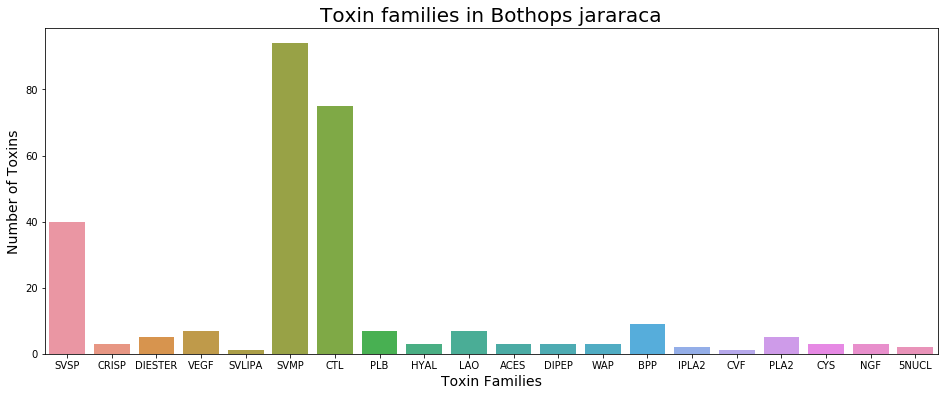

In [19]:
plt.figure(figsize=(16, 6))
species = db.proteins.distinct('species')
fig2= sns.countplot(df.Family)
plt.xlabel('Toxin Families', size=14)
plt.ylabel('Number of Toxins', size=14)
plt.title('Toxin families in {}'.format(species[0]), size=20)
plt.show(fig2)

In [20]:
df.Family.value_counts()

SVMP       94
CTL        75
SVSP       40
BPP         9
VEGF        7
LAO         7
PLB         7
PLA2        5
DIESTER     5
ACES        3
CRISP       3
NGF         3
CYS         3
WAP         3
HYAL        3
DIPEP       3
5NUCL       2
IPLA2       2
CVF         1
SVLIPA      1
Name: Family, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

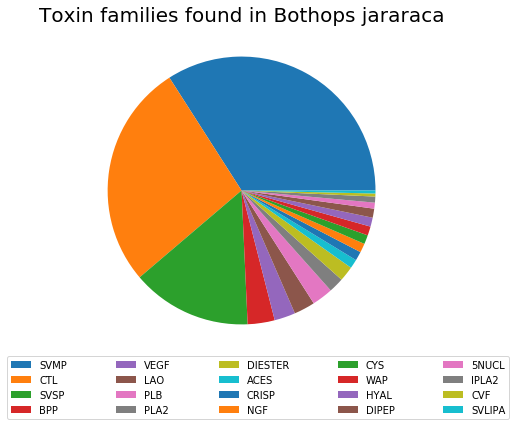

In [21]:
# 
labels = df.Family.value_counts().index
plt.figure(figsize=(6,6))
fatias, texto = plt.pie(df.Family.value_counts())
plt.axes().set_aspect('equal', 'datalim')
plt.legend(labels,  loc=3, ncol=5, mode="expand", borderaxespad=0., bbox_to_anchor=(-0.2, -0.2, 1.5,3))
plt.title('Toxin families found in {}'.format(species[0]), size=20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

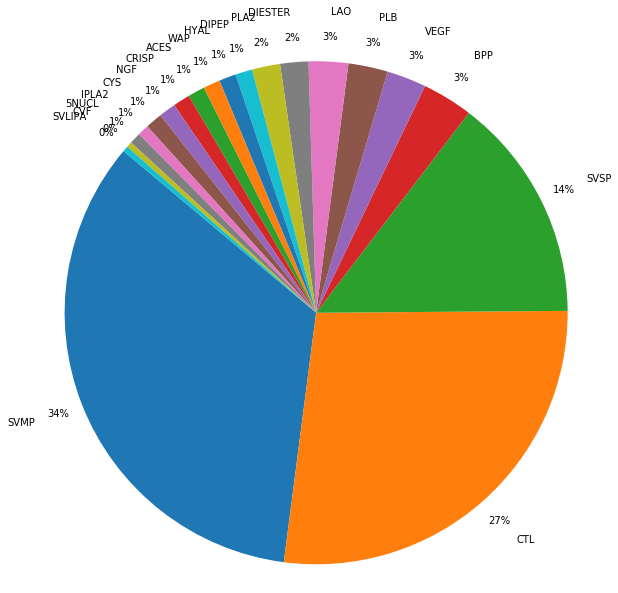

In [135]:
# Pie chart 2
labels = df.Family.value_counts().index
plt.figure(figsize=(10,10))
plt.pie(df.Family.value_counts(), labels=labels, autopct='%1.0f%%', startangle=140, 
                        pctdistance=1.1, labeldistance=1.2, radius=1.6)
plt.axis('equal')
plt.show

In [158]:
# Sum of expression level by toxin family
data = df.groupby(['Family']).tpm.sum()
expression_sorted = data.sort_values(ascending=False)
expression_sorted

Family
CTL        493810.02
SVMP       335565.03
SVSP        90657.72
CRISP       19428.80
LAO         18942.06
PLA2        18650.71
VEGF         7448.66
PLB          4202.05
BPP          3966.54
NGF          2847.95
DIESTER      1910.61
5NUCL        1154.31
WAP           489.11
HYAL          350.18
IPLA2         261.74
SVLIPA        141.35
CYS            83.80
DIPEP          59.08
CVF            20.87
ACES            9.48
Name: tpm, dtype: float64

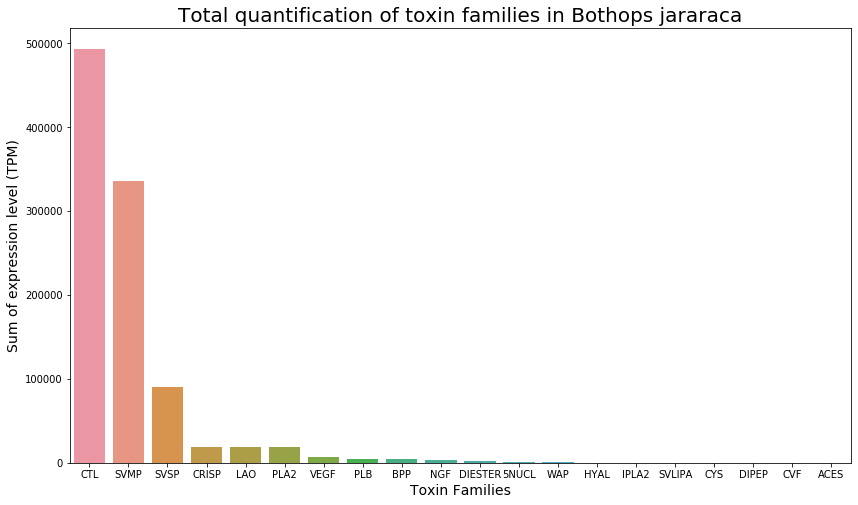

In [167]:
# Expression level by family 
plt.figure(figsize=(14,8))
sns.barplot(expression_sorted.index, expression_sorted.values)
plt.xlabel('Toxin Families', size=14)
plt.ylabel('Sum of expression level (TPM)', size=14)
plt.title('Total quantification of toxin families in {}'.format(species[0]), size=20)
plt.show()